In [337]:
#NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [338]:
#Redaing data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [339]:
df.shape

(730, 16)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


### Insights:
*730 rows and 16 columns.*

*No Missing values for any columns.*

*Target column is 'cnt'*

In [341]:
#checking all the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [342]:
# renaming columns for better understanding
df.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

## EDA

#### Data Visualisation

#### Removing unnecessary columns

instant is a record indexand it can be removed.

dteday is date column and we already have month and year columns in dataframe.so we can remove it 

addition of casual and registered columns gives Count column, and we will not going to get much information from these columns, thus we wil drop these two as well.

In [343]:
cols = ['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather', 'temp', 'atemp', 
            'Humidity', 'windspeed','Count']

df1 = df[cols]
df1.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Categorical Variables

all the columns are of numerical type, but from the data dictionary we see that there are columns which represents categorical data.

Binary Types : Year, holiday, workingday

Categorical Types: Season, Month, weekday, Weather

Numeric types: temp, atemp, Humidity, windspeed, Count

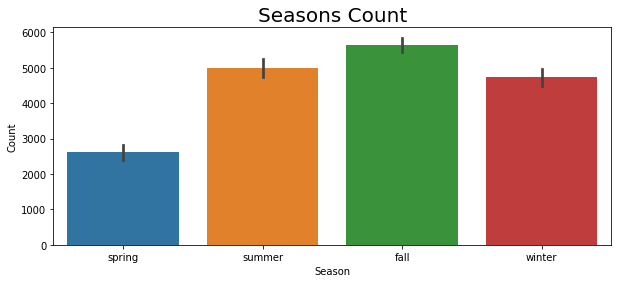

In [344]:
# mapping proper names for Season

# season 1:spring, 2:summer, 3:fall, 4:winter


df1['Season'] = df1['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})




plt.figure(figsize=[10,4])
sns.barplot(df1['Season'],df1['Count'])
plt.title('Seasons Count', fontsize = 20)
plt.show()

### Insights:

In fall there seems to be highest demand of bikes, followed by Summer and Winter

Spring seems to be the least season where demand is less

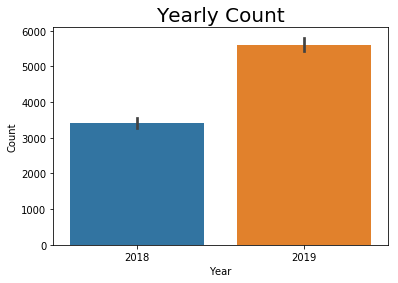

In [345]:
# mapping Year varible with proper names 

df1['Year'] = df1['Year'].map({0:'2018',1:'2019'})




sns.barplot(df1['Year'],df1['Count'])
plt.title('Yearly Count', fontsize = 20)
plt.show()

### Insights:

average rented bikes has increased in 2019 almost double of 2018

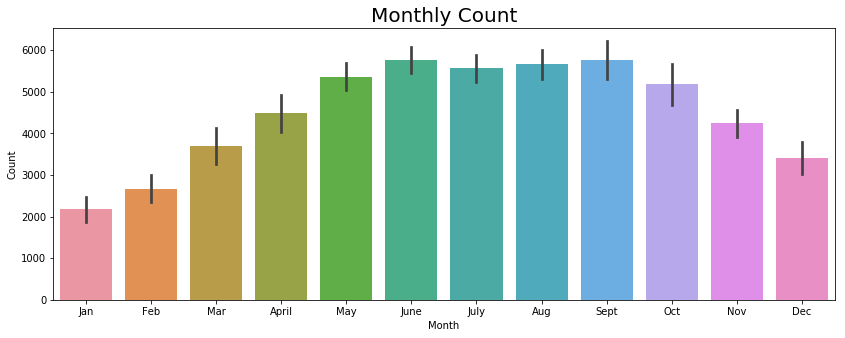

In [346]:
# mapping Month 

df1['Month'] = df1['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})




plt.figure(figsize=[14,5])
sns.barplot(df1['Month'],df1['Count'])
plt.title('Monthly Count', fontsize = 20)
plt.show()

### Insights:

More and almost similar average count of rented bikes in August, June, September, July followed by May, October.

December, January, February have the least demand 

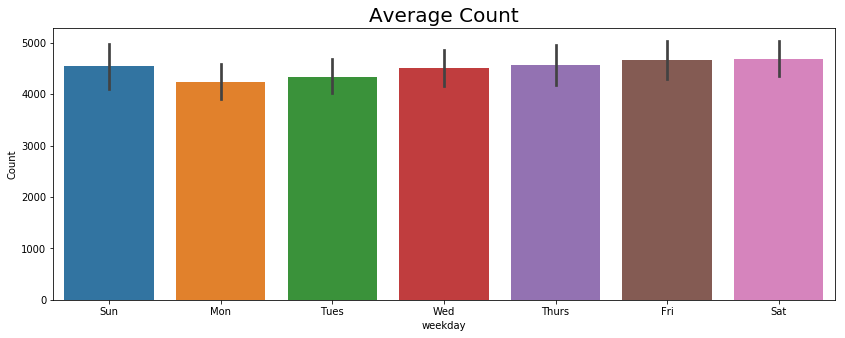

In [347]:
# mapping weekday variable

df1['weekday'] = df1['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})



plt.figure(figsize=[14,5])
sns.barplot(df1['weekday'],df1['Count'])
plt.title('Average Count', fontsize = 20)
plt.show()

### Insights:

looks like all days have similar demands, but still Sunday, Monday, Saturday, Friday has high demands than other days

People less prefer rented bike on Thrusday, Wednesday,Tuesday

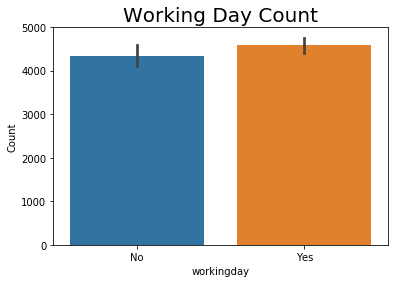

In [348]:
# mapping workingday varible 

df1['workingday'] = df1['workingday'].map({0:'No',1:'Yes'})



sns.barplot(df1['workingday'],df1['Count'])

plt.title('Working Day Count', fontsize = 20)
plt.show()

### Insights:

There are similar demands whether it's a working day or not.

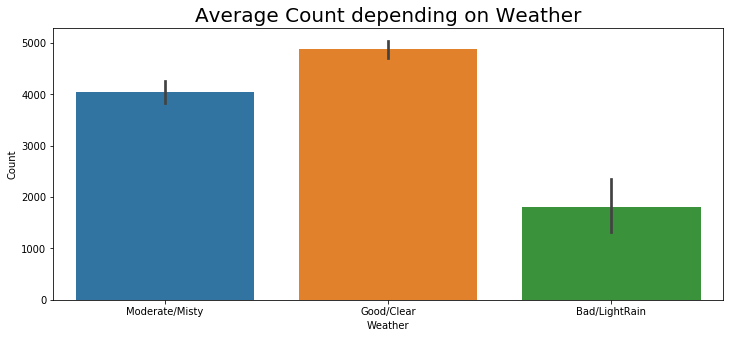

In [349]:
# mapping Weather 
#weathersit : 
# 1: Clear, Few clouds, Partly cloudy   = Good/Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad/Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain


df1['Weather'] = df1['Weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})




plt.figure(figsize=[12,5])
sns.barplot(df1['Weather'],df1['Count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

### Insights:

It clearly shows that if the weather is clear, the demand is more

If the weather is bad, demand decreases drastically



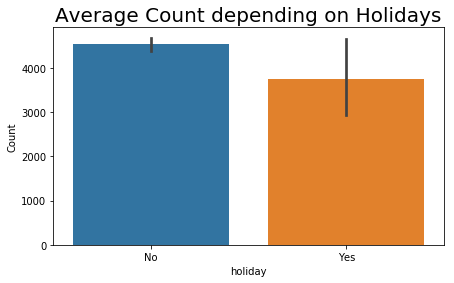

In [350]:
# mapping Holiday 
df1['holiday'] = df1['holiday'].map({0:'No',1:'Yes'})



plt.figure(figsize=[7,4])
sns.barplot(df1['holiday'],df1['Count'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

### Insights:

There is high decrease of demand if it is a holiday

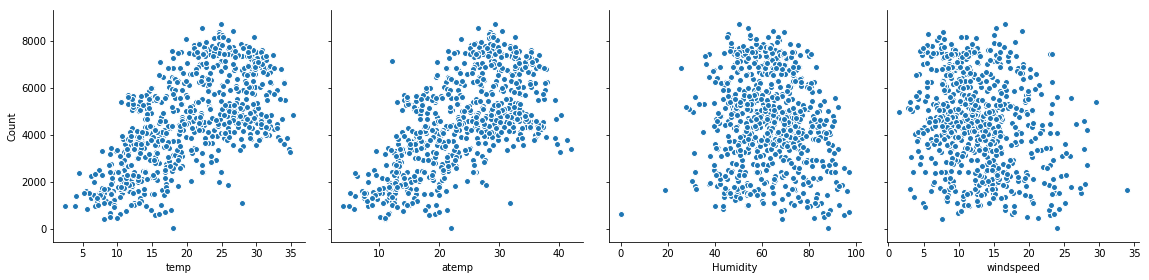

In [351]:
sns.pairplot(df1, x_vars=['temp','atemp','Humidity','windspeed'], y_vars='Count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

### Insight:

as can be seen from above plots, there is some linear relation between temp, atemp with Count.

this shows that we can do linear regression for solving the problem.

In [352]:
df1.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,2018,Jan,No,Sun,No,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Mon,No,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Tues,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Wed,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Thurs,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


In [353]:
# creating a list and putting all category columns in to it and converting them to category data type

cat = ['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather']

for i in cat:
    df1[i] = df1[i].astype('category')

In [354]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
Season        730 non-null category
Year          730 non-null category
Month         730 non-null category
holiday       730 non-null category
weekday       730 non-null category
workingday    730 non-null category
Weather       730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
Humidity      730 non-null float64
windspeed     730 non-null float64
Count         730 non-null int64
dtypes: category(7), float64(4), int64(1)
memory usage: 34.9 KB


In [355]:
# for Linear model creating dummies

dummy = pd.get_dummies(df1[cat], drop_first=True)
dummy.head()

,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [356]:
# Combining both the dataframe, bike_1 and of dummy variables

df1 = pd.concat([df1,dummy], axis=1)
df1.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,spring,2018,Jan,No,Sun,No,Moderate/Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,No,Mon,No,Moderate/Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,0,0,0,1
2,spring,2018,Jan,No,Tues,Yes,Good/Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,1,0
3,spring,2018,Jan,No,Wed,Yes,Good/Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,1,1,0
4,spring,2018,Jan,No,Thurs,Yes,Good/Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,1,0


In [357]:
# dropping columns from which dummy varibles were created

df1.drop(cat, axis=1, inplace = True)
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
temp                      730 non-null float64
atemp                     730 non-null float64
Humidity                  730 non-null float64
windspeed                 730 non-null float64
Count                     730 non-null int64
Season_spring             730 non-null uint8
Season_summer             730 non-null uint8
Season_winter             730 non-null uint8
Year_2019                 730 non-null uint8
Month_Aug                 730 non-null uint8
Month_Dec                 730 non-null uint8
Month_Feb                 730 non-null uint8
Month_Jan                 730 non-null uint8
Month_July                730 non-null uint8
Month_June                730 non-null uint8
Month_Mar                 730 non-null uint8
Month_May                 730 non-null uint8
Month_Nov                 730 non-null uint8
Month_Oct                 730 non-null uint8
Month_Sept                730 no

### Spliting training and Test data

In [358]:
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [359]:
df_training, df_test = train_test_split(df1, train_size=0.70, random_state=100)

In [360]:
print(df_training.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the features

In [361]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# performing scaling on all the numericals variables of train dataset and leaving Count variable aside

num_vars = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

df_training[num_vars] = scaler.fit_transform(df_training[num_vars])
df_training[num_vars].head()

,temp,atemp,Humidity,windspeed,Count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [362]:
df_training.describe()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,...,0.025490,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.676471,0.625490,0.345098
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,...,0.157763,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.468282,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


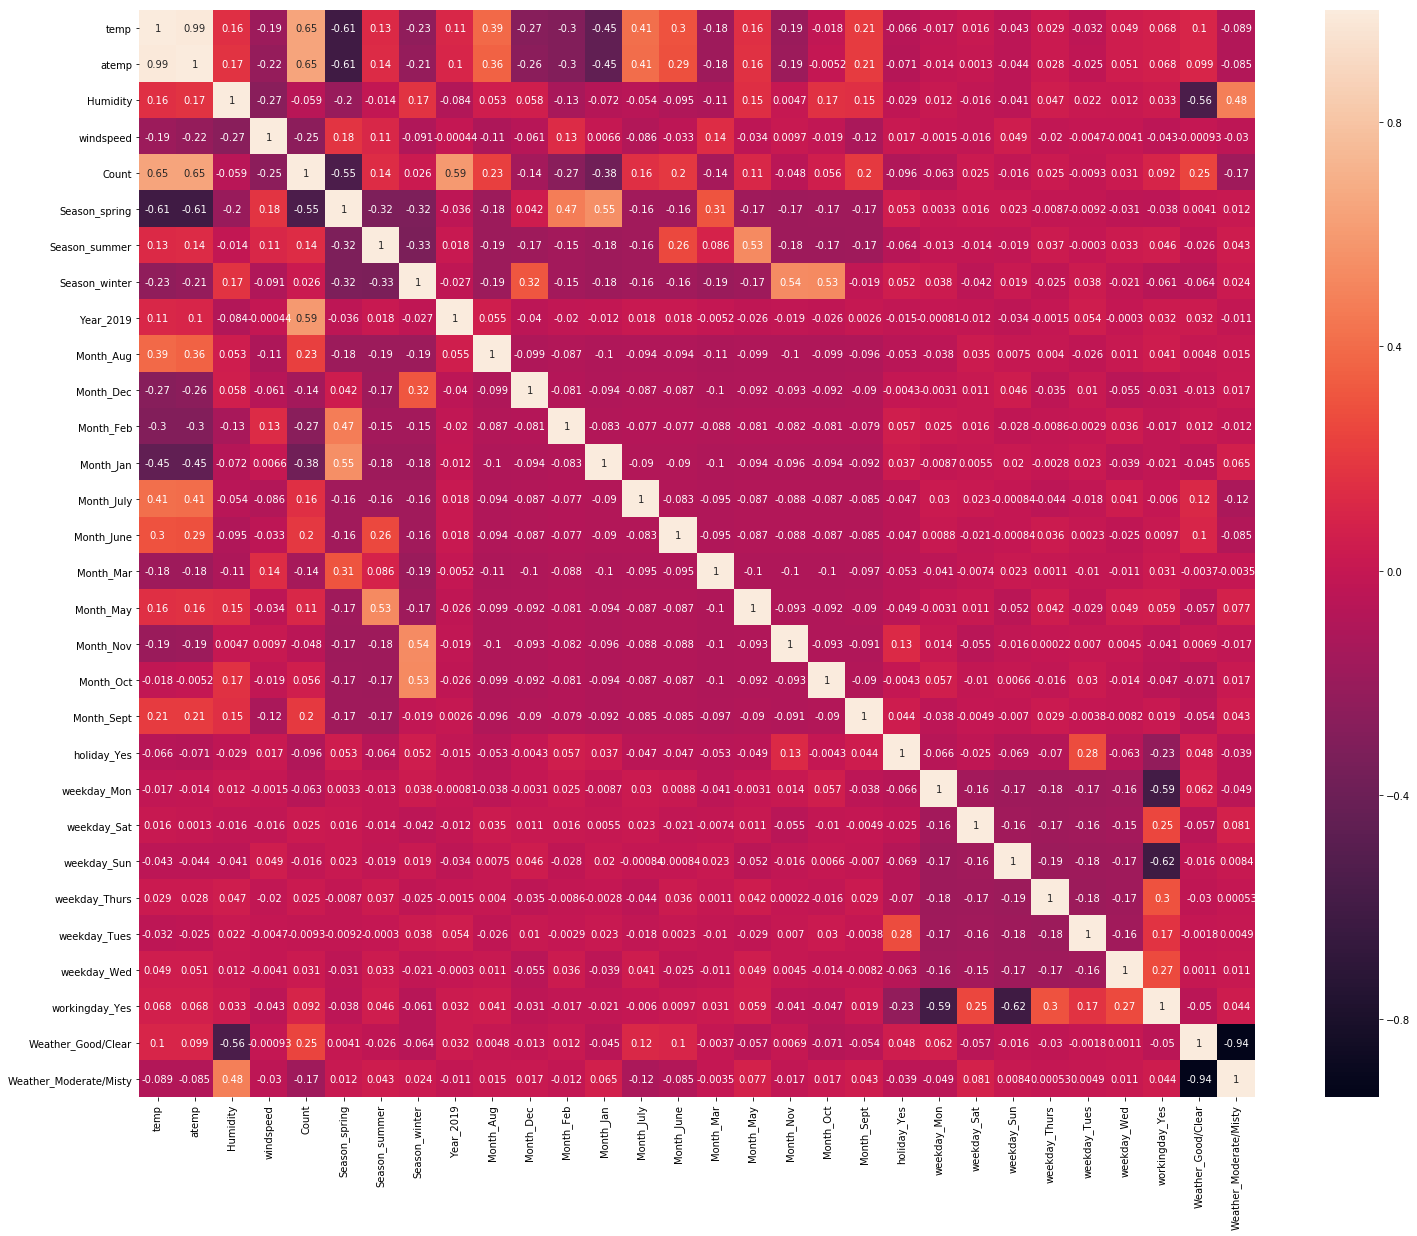

In [363]:
##### checking correlation
plt.figure(figsize = [25,20])
sns.heatmap(df_training.corr(),annot =True)
plt.show()

### Model Building

In [364]:
# Dividing training set into X_train and y_train 

y_train = df_training.pop('Count')
X_train = df_training

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [365]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [366]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Aug', False, 7),
 ('Month_Dec', False, 3),
 ('Month_Feb', False, 4),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 13),
 ('Month_Mar', False, 15),
 ('Month_May', False, 6),
 ('Month_Nov', False, 2),
 ('Month_Oct', False, 12),
 ('Month_Sept', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 14),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 10),
 ('workingday_Yes', True, 1),
 ('Weather_Good/Clear', True, 1),
 ('Weather_Moderate/Misty', True, 1)]

In [367]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'Humidity', 'windspeed', 'Season_spring', 'Season_summer',
       'Season_winter', 'Year_2019', 'Month_Jan', 'Month_July', 'Month_Sept',
       'holiday_Yes', 'weekday_Sun', 'workingday_Yes', 'Weather_Good/Clear',
       'Weather_Moderate/Misty'],
      dtype='object')

In [368]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'weekday_Mon',
       'weekday_Sat', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [369]:
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,Year_2019,Month_Jan,Month_July,Month_Sept,holiday_Yes,weekday_Sun,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
576,0.815169,0.725633,0.264686,0,0,0,1,0,1,0,0,0,1,1,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,1,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,1,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1,0,1


### Model1

In [370]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.22e-191
Time:                        13:50:14   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0044      0.048      0.092      0.927      -0.091       0.099
temp                       0.5096      0.034     14.837      0.000       0.442       0.577
Humidity                  -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                 -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Season_spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Season_summer              0.0508      0.015      3.423      0.001       0.022       0.080
Season_winter              0.0933      0.017      5.403      0.000       0.059       0.127
Year_2019                  0.2305      0.008     28.795      0.000       0.215       0.246
Month_Jan                 -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Month_July                -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Month_Sept                 0.0814      0.016      4.945      0.000       0.049       0.114
holiday_Yes               -0.0582      0.027     -2.164      0.031      -0.111      -0.005
weekday_Sun                0.0536      0.014      3.694      0.000       0.025       0.082
workingday_Yes             0.0433      0.012      3.762      0.000       0.021       0.066
Weather_Good/Clear         0.2475      0.026      9.507      0.000       0.196       0.299
Weather_Moderate/Misty     0.1911      0.025      7.755      0.000       0.143       0.240
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity,25.63
0,temp,22.84
13,Weather_Good/Clear,14.80
14,Weather_Moderate/Misty,9.07
3,Season_spring,5.69
12,workingday_Yes,5.42
2,windspeed,4.69
5,Season_winter,4.12
4,Season_summer,3.21
6,Year_2019,2.10


### Model 2
removing feature - Humidity due very high VIF values as all the p-values < 0.05.

In [372]:
X_train_rfe2 = X_train_rfe.drop('Humidity', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.60e-188
Time:                        13:50:15   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1171      0.039     -2.980      0.003      -0.194      -0.040
temp                       0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                 -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Season_spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
Season_summer              0.0445      0.015      2.967      0.003       0.015       0.074
Season_winter              0.0784      0.017      4.562      0.000       0.045       0.112
Year_2019                  0.2345      0.008     29.009      0.000       0.219       0.250
Month_Jan                 -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Month_July                -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Month_Sept                 0.0755      0.017      4.527      0.000       0.043       0.108
holiday_Yes               -0.0558      0.027     -2.042      0.042      -0.109      -0.002
weekday_Sun                0.0583      0.015      3.968      0.000       0.029       0.087
workingday_Yes             0.0464      0.012      3.966      0.000       0.023       0.069
Weather_Good/Clear         0.2908      0.024     11.977      0.000       0.243       0.339
Weather_Moderate/Misty     0.2095      0.025      8.499      0.000       0.161       0.258
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [373]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Weather_Good/Clear,14.79
0,temp,13.96
13,Weather_Moderate/Misty,8.48
11,workingday_Yes,5.34
1,windspeed,4.67
2,Season_spring,4.48
3,Season_summer,2.79
4,Season_winter,2.74
5,Year_2019,2.08
10,weekday_Sun,1.99


### Model 3
removing feature - 'Weather_Moderate/Misty' due very high VIF values as all the p-values < 0.05. even temp and Weather_Good/Clear has value way higher VIF but from data dictionary and EDA we get that they play a major role in the demand of bikes. thus we are retaining them as of now.

In [374]:
X_train_rfe3 = X_train_rfe2.drop('Weather_Moderate/Misty', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.39e-175
Time:                        13:50:16   Log-Likelihood:                 476.02
No. Observations:                 510   AIC:                            -924.0
Df Residuals:                     496   BIC:                            -864.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0819      0.034      2.427      0.016       0.016       0.148
temp                   0.4769      0.036     13.229      0.000       0.406       0.548
windspeed             -0.1784      0.026     -6.748      0.000      -0.230      -0.126
Season_spring         -0.0574      0.022     -2.569      0.010      -0.101      -0.013
Season_summer          0.0479      0.016      2.985      0.003       0.016       0.079
Season_winter          0.0717      0.018      3.909      0.000       0.036       0.108
Year_2019              0.2380      0.009     27.576      0.000       0.221       0.255
Month_Jan             -0.0332      0.019     -1.768      0.078      -0.070       0.004
Month_July            -0.0533      0.020     -2.723      0.007      -0.092      -0.015
Month_Sept             0.0716      0.018      4.016      0.000       0.037       0.107
holiday_Yes           -0.0528      0.029     -1.808      0.071      -0.110       0.005
weekday_Sun            0.0550      0.016      3.501      0.001       0.024       0.086
workingday_Yes         0.0433      0.012      3.465      0.001       0.019       0.068
Weather_Good/Clear     0.0972      0.009     10.816      0.000       0.080       0.115
==============================================================================
Omnibus:                       97.632   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.925
Skew:                          -0.892   Prob(JB):                     4.52e-66
Kurtosis:                       6.314   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [375]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.83
11,workingday_Yes,5.18
1,windspeed,4.63
2,Season_spring,3.18
12,Weather_Good/Clear,2.71
3,Season_summer,2.32
5,Year_2019,2.07
4,Season_winter,1.97
10,weekday_Sun,1.95
6,Month_Jan,1.61


### Model 4
removing feature - 'Month_Jan' coz high p-values(0.078).

In [376]:
X_train_rfe4 = X_train_rfe3.drop('Month_Jan', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.48e-175
Time:                        13:50:17   Log-Likelihood:                 474.42
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     497   BIC:                            -867.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0676      0.033      2.058      0.040       0.003       0.132
temp                   0.4933      0.035     14.129      0.000       0.425       0.562
windspeed             -0.1721      0.026     -6.555      0.000      -0.224      -0.121
Season_spring         -0.0622      0.022     -2.798      0.005      -0.106      -0.019
Season_summer          0.0505      0.016      3.158      0.002       0.019       0.082
Season_winter          0.0771      0.018      4.250      0.000       0.041       0.113
Year_2019              0.2374      0.009     27.467      0.000       0.220       0.254
Month_July            -0.0548      0.020     -2.794      0.005      -0.093      -0.016
Month_Sept             0.0720      0.018      4.032      0.000       0.037       0.107
holiday_Yes           -0.0536      0.029     -1.833      0.067      -0.111       0.004
weekday_Sun            0.0547      0.016      3.473      0.001       0.024       0.086
workingday_Yes         0.0431      0.013      3.444      0.001       0.019       0.068
Weather_Good/Clear     0.0978      0.009     10.871      0.000       0.080       0.116
==============================================================================
Omnibus:                       97.160   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.609
Skew:                          -0.887   Prob(JB):                     8.72e-66
Kurtosis:                       6.309   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [377]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.74
10,workingday_Yes,5.14
1,windspeed,4.61
11,Weather_Good/Clear,2.71
2,Season_spring,2.57
3,Season_summer,2.32
5,Year_2019,2.06
4,Season_winter,1.96
9,weekday_Sun,1.94
6,Month_July,1.59


### Model 5
removing feature - 'Month_July' coz of high collinearity with temp variable.

even hum and temp VIF values are high but from data dictionary we get that it plays a major role of humidity and temperature, thus we will retain them.

In [378]:
X_train_rfe5 = X_train_rfe4.drop('Month_July', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.82e-175
Time:                        13:50:17   Log-Likelihood:                 470.44
No. Observations:                 510   AIC:                            -916.9
Df Residuals:                     498   BIC:                            -866.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0588      0.033      1.788      0.074      -0.006       0.123
temp                   0.4793      0.035     13.778      0.000       0.411       0.548
windspeed             -0.1725      0.026     -6.526      0.000      -0.224      -0.121
Season_spring         -0.0497      0.022     -2.269      0.024      -0.093      -0.007
Season_summer          0.0670      0.015      4.471      0.000       0.038       0.096
Season_winter          0.0905      0.018      5.137      0.000       0.056       0.125
Year_2019              0.2380      0.009     27.361      0.000       0.221       0.255
Month_Sept             0.0868      0.017      5.056      0.000       0.053       0.121
holiday_Yes           -0.0514      0.029     -1.743      0.082      -0.109       0.007
weekday_Sun            0.0553      0.016      3.491      0.001       0.024       0.086
workingday_Yes         0.0445      0.013      3.531      0.000       0.020       0.069
Weather_Good/Clear     0.0966      0.009     10.672      0.000       0.079       0.114
==============================================================================
Omnibus:                       99.857   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.804
Skew:                          -0.923   Prob(JB):                     2.15e-65
Kurtosis:                       6.257   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [379]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.63
9,workingday_Yes,5.14
1,windspeed,4.60
10,Weather_Good/Clear,2.70
2,Season_spring,2.47
5,Year_2019,2.06
3,Season_summer,1.97
8,weekday_Sun,1.94
4,Season_winter,1.80
6,Month_Sept,1.23


### Model 6
removing feature - 'Season_spring' coz of high negative collinearity with temp variable.

In [380]:
X_train_rfe6 = X_train_rfe5.drop('Season_spring', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.07e-175
Time:                        13:50:18   Log-Likelihood:                 467.82
No. Observations:                 510   AIC:                            -913.6
Df Residuals:                     499   BIC:                            -867.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0006      0.021      0.031      0.976      -0.040       0.041
temp                   0.5424      0.021     25.839      0.000       0.501       0.584
windspeed             -0.1769      0.026     -6.685      0.000      -0.229      -0.125
Season_summer          0.0903      0.011      8.252      0.000       0.069       0.112
Season_winter          0.1218      0.011     11.119      0.000       0.100       0.143
Year_2019              0.2368      0.009     27.161      0.000       0.220       0.254
Month_Sept             0.0960      0.017      5.727      0.000       0.063       0.129
holiday_Yes           -0.0532      0.030     -1.800      0.072      -0.111       0.005
weekday_Sun            0.0558      0.016      3.506      0.000       0.025       0.087
workingday_Yes         0.0448      0.013      3.543      0.000       0.020       0.070
Weather_Good/Clear     0.0961      0.009     10.582      0.000       0.078       0.114
==============================================================================
Omnibus:                       93.219   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.240
Skew:                          -0.891   Prob(JB):                     3.76e-56
Kurtosis:                       5.972   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.41
8,workingday_Yes,4.23
1,windspeed,3.61
9,Weather_Good/Clear,2.57
4,Year_2019,2.02
7,weekday_Sun,1.74
2,Season_summer,1.56
3,Season_winter,1.38
5,Month_Sept,1.20
6,holiday_Yes,1.13


### Residual Analysis Of Training Data

In [382]:
y_train_pred = lr6.predict(X_train_lm6)

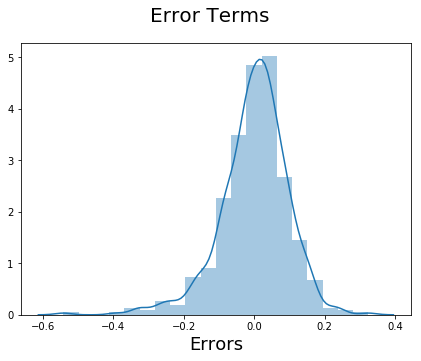

In [383]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

INSIGHT: - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### MAKING PREDICTION USING FINAL MODEL

In [384]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [385]:
df_test.describe()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,...,0.036364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.700000,0.654545,0.318182
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,...,0.187620,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.459303,0.476601,0.466833
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [386]:
# Dividing test set into X_test and y_test sets for the model building

y_test = df_test.pop('Count')
X_test = df_test

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [387]:
#Selecting the variables that were part of final model (Model 8).
col_test = X_train_rfe6.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.head()

,const,temp,windspeed,Season_summer,Season_winter,Year_2019,Month_Sept,holiday_Yes,weekday_Sun,workingday_Yes,Weather_Good/Clear
184,1.0,0.831783,0.084219,0,0,0,0,1,0,0,0
535,1.0,0.901354,0.153728,1,0,1,0,0,0,1,1
299,1.0,0.511964,0.334206,0,1,0,0,0,0,1,0
221,1.0,0.881625,0.339570,0,0,0,0,0,0,1,1
152,1.0,0.817246,0.537414,1,0,0,0,0,0,1,1


In [388]:
# Making predictions using the final model (lr8)

y_test_pred = lr6.predict(X_test_lm6)

### Model Evaluation

Text(0,0.5,'y_test_pred')

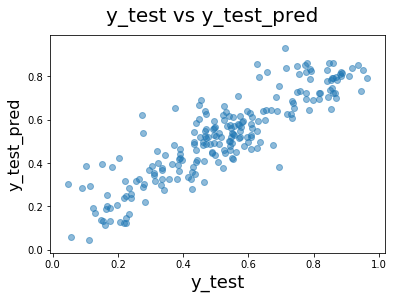

In [389]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

We can see there is linear relationship between y_test and y_test_pred

### Residaul Analysis

In [390]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 78.51
Train data r^2 : 81.4


### Adjusted R^2 Value for TEST

In [391]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe6.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe6.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 77.48
Train data adjusted r^2 : 81.03


As per my final Model, the below predictor variables influences bike booking :

Temperature (temp)

September Month

Year -2019

Summer Seaon

Winter Season

If its a holiday

If the weather is clear/Good

Speed of the Wind